C:\Users\halm9\AppData\Local\Temp\ipykernel_13988\4033081734.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  defunciones = pd.read_csv('defunciones_clean.csv')
C:\Users\halm9\AppData\Local\Temp\ipykernel_13988\4033081734.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('defunciones_clean.csv') # Cargar los datos limpios


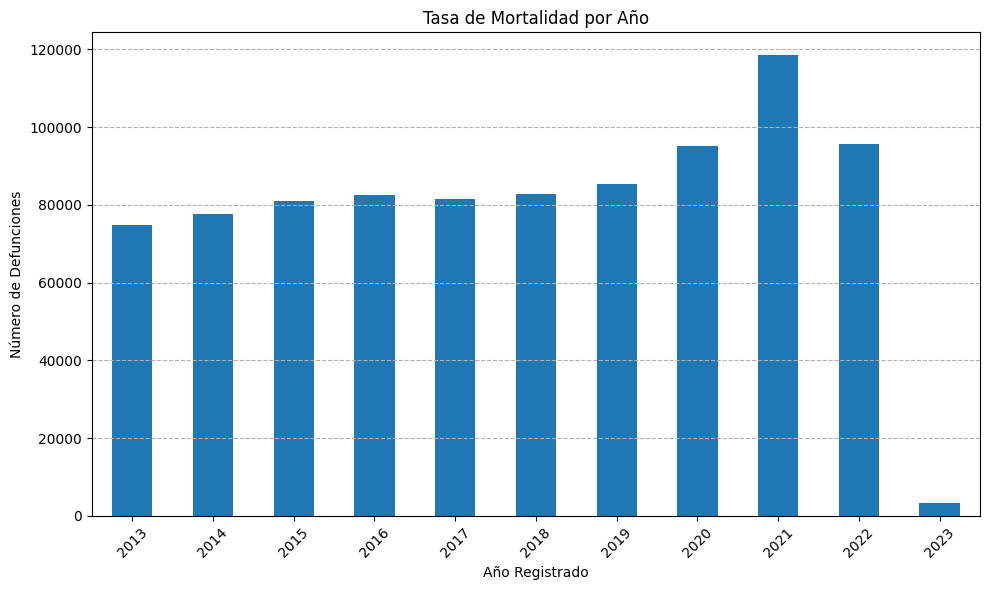

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

defunciones = pd.read_csv('defunciones_clean.csv')


# Tendencias Temporales:
# 1. ¿Cómo ha evolucionado la tasa de mortalidad general a lo largo de los años?

df = pd.read_csv('defunciones_clean.csv') # Cargar los datos limpios

df['año_registrado'] = df['año_registrado'].astype(int) # Asegurarse de que 'año_registrado' es del tipo correcto

defunciones_por_año = df.groupby('año_registrado').size() # Contar el número de defunciones por año

# Graficar la tasa de mortalidad por año
plt.figure(figsize=(10, 6))
defunciones_por_año.plot(kind='bar')
plt.title('Tasa de Mortalidad por Año')
plt.xlabel('Año Registrado')
plt.ylabel('Número de Defunciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



In [2]:
# Causas de Defunción:
# 2. ¿Cuáles son las principales causas de defunción registradas cada año?
import pandas as pd

# Cargar los datos limpios
df = pd.read_csv('defunciones_clean.csv')

# Asegurarse de que 'año_registrado' es del tipo correcto
df['año_registrado'] = df['año_registrado'].astype(int)

# Agrupar por año y causa de defunción, y contar el número de defunciones
defunciones_por_causa_año = df.groupby(['año_registrado', 'causa']).size().reset_index(name='conteo')

# Para cada año, encontrar las causas de defunción más comunes
años = defunciones_por_causa_año['año_registrado'].unique()
for año in años:
    print(f"\nAño: {año}")
    defunciones_año = defunciones_por_causa_año[defunciones_por_causa_año['año_registrado'] == año]
    defunciones_año = defunciones_año.sort_values(by='conteo', ascending=False).head(10)
    print(defunciones_año)


C:\Users\halm9\AppData\Local\Temp\ipykernel_13988\2917287165.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('defunciones_clean.csv')



Año: 2013
      año_registrado causa  conteo
659             2013  J189    5103
531             2013  I219    4674
1367            2013  X599    2659
393             2013  E149    2512
9               2013  A09X    2196
656             2013  J180    1924
799             2013  K746    1839
1235            2013  R98X    1828
593             2013  I64X    1783
1417            2013  X959    1719

Año: 2014
      año_registrado causa  conteo
2010            2014  I219    5401
2145            2014  J189    4834
1866            2014  E149    2929
2870            2014  X599    2590
1459            2014  A09X    2156
2293            2014  K746    2112
2928            2014  X959    2021
2079            2014  I64X    1937
2141            2014  J180    1826
2716            2014  R54X    1441

Año: 2015
      año_registrado causa  conteo
3547            2015  I219    5586
3689            2015  J189    5127
3367            2015  E149    2940
4362            2015  R98X    2775
4481            2015  